In [80]:
import pandas as pd
import numpy as np
from scipy.stats import norm, chisquare, ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and Clean the Original Dataset

In [81]:
df = pd.read_csv("dataset.csv", sep=";", skiprows=1)
df.columns = df.columns.str.strip()
    
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#### Analyze Original Data Distribution

In [82]:
# category distribution
category_dist = df['Category1'].value_counts(normalize=True).sort_index()
    
# distribution parameters
mean1, std_dev1 = norm.fit(df['Value1'])
mean2, std_dev2 = norm.fit(df['Value2'])

#### Generating a New Synthetic Dataset Based on Above Values

In [83]:
# Set random seed for reproducibility
np.random.seed(38)

num_new_samples = 1000
new_data = pd.DataFrame({
    "Category1": np.random.choice(category_dist.index, p=category_dist.values, size=num_new_samples),
    "Value1": np.random.normal(mean1, std_dev1, num_new_samples),
    "Value2": np.random.normal(mean2, std_dev2, num_new_samples),
})
    
# new dataset
new_data.to_csv("new_dataset.csv", sep=";", index=False)
print("\n new synthetic dataset samples:")
print(new_data.head())
    


 new synthetic dataset samples:
  Category1     Value1     Value2
0         B   8.404965  12.118612
1         D  10.867583  16.390370
2         E   6.596490  22.879494
3         C   5.594124  30.624547
4         C  10.999279  17.993262


#### Chi-Square Test for Category1

In [84]:
original_cat_counts = df['Category1'].value_counts().sort_index()
new_cat_counts = new_data['Category1'].value_counts().reindex(original_cat_counts.index, fill_value=0)

# Rescale expected frequencies to match the total of observed frequencies
scaled_expected = original_cat_counts * (new_cat_counts.sum() / original_cat_counts.sum())
chi_stat, chi_p = chisquare(f_obs=new_cat_counts, f_exp=scaled_expected)

print("Chi-Square p-value (Category1):", chi_p)
    

Chi-Square p-value (Category1): 0.8013337442825279


#### Kolmogorov–Smirnov (KS) Test for Continuous Variables

In [85]:
ks_value1 = ks_2samp(df['Value1'], new_data['Value1'])
ks_value2 = ks_2samp(df['Value2'], new_data['Value2'])

print("KS-Test p-value (Value1):", ks_value1.pvalue)
print("KS-Test p-value (Value2):", ks_value2.pvalue)

KS-Test p-value (Value1): 0.9666576117554556
KS-Test p-value (Value2): 0.8572478810406142


#### Visual Comparison of Original vs. Synthetic Data

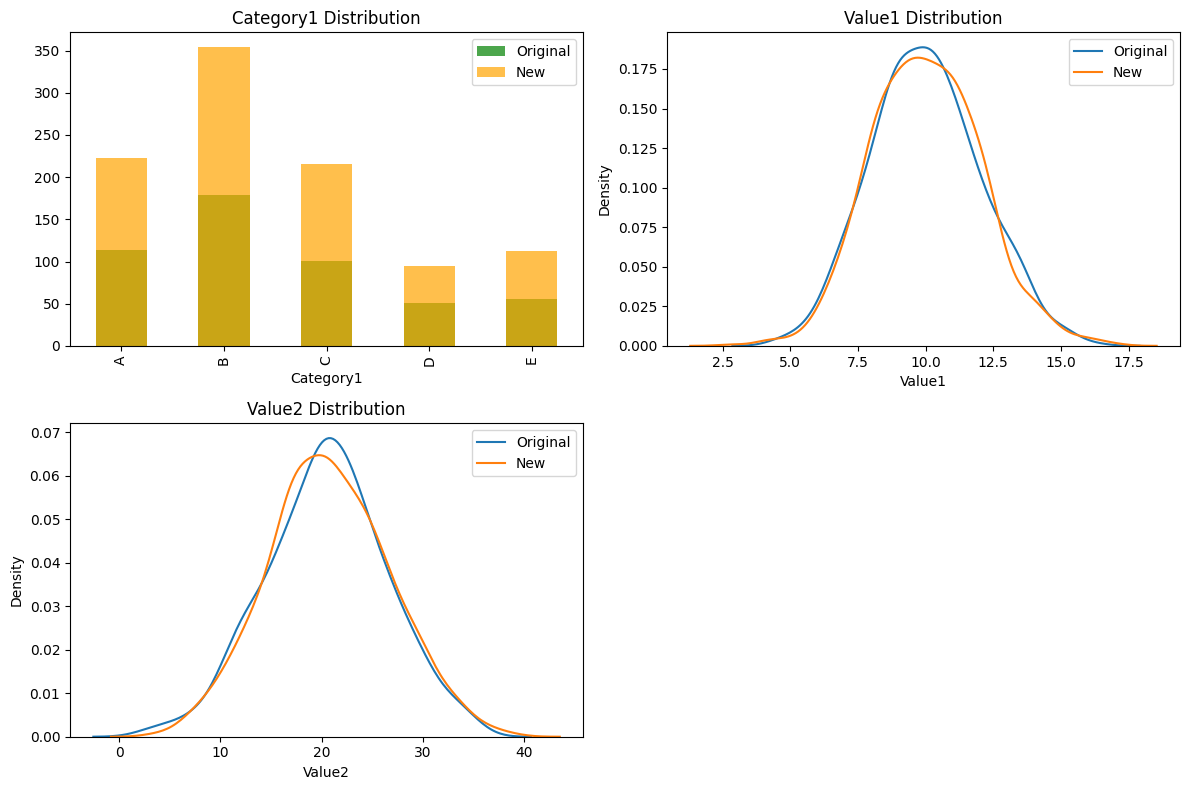

In [86]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
original_cat_counts.plot(kind='bar', ax=axs[0, 0], alpha=0.7, label='Original', color='green')
new_cat_counts.plot(kind='bar', ax=axs[0, 0], alpha=0.7, label='New', color='orange')
axs[0, 0].set_title("Category1 Distribution")
axs[0, 0].legend()   
    
sns.kdeplot(df['Value1'], label='Original', ax=axs[0, 1])
sns.kdeplot(new_data['Value1'], label='New', ax=axs[0, 1])
axs[0, 1].set_title("Value1 Distribution")
axs[0, 1].legend()
    
sns.kdeplot(df['Value2'], label='Original', ax=axs[1, 0])
sns.kdeplot(new_data['Value2'], label='New', ax=axs[1, 0])
axs[1, 0].set_title("Value2 Distribution")
axs[1, 0].legend()
    
axs[1, 1].axis('off')
plt.tight_layout()
plt.savefig("comparison_plots.png")
    
 
